# My First ML Project Step by Step



The best small project to start with in ML is the classiﬁcation of iris ﬂowers. 
This is a good dataset to begin with because it is very well understood.

Attributes are numeric so handling of data is not needed

It is a classiﬁcation problem, an easier type of supervised learning problem

It is small and easily fits memory. It only has 4 attrfeatures and 150 rows

All of the numeric attributes are in the same units and the same scale. So feature scaling and transformations are not needed


Typical Steps in an ML project

1. Loading dataset
2. Summarizing dataset
3. Visualizing dataset
4. Evaluating algorithms
5. Making some predictions

# 1. Load the Data

In [4]:
# Load libraries 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC


In [3]:
# load the dataset
iris = pd.read_csv("iris.csv")
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Summarize the Dataset

In [4]:
# Eye ball the data
iris.head(20)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# dimensions of the dataset
iris.shape

(150, 5)

In [6]:
# Statistical Summary
iris.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# class distribution as this is a classification problem
iris["class"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

# 3. Data Visualization

In [8]:
# After having some basic idea on the data, it is a good way to understand better with visualizations

# Univariate plots --> to understand better about each attribute
# Multivariate plots --> to understand better about relationships between attributes






In [9]:
# Univariate plots

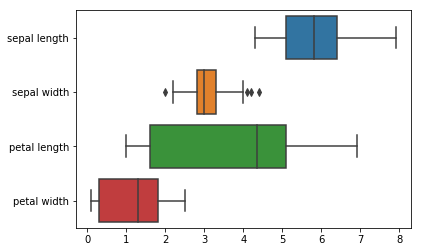

In [10]:
sns.boxplot(data=iris, orient='h')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022525EF8630>,
      dtype=object)

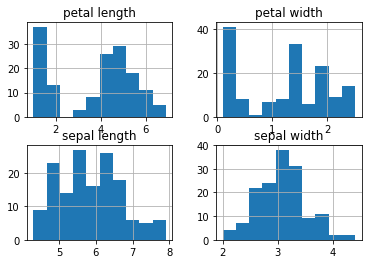

In [11]:
iris.hist()

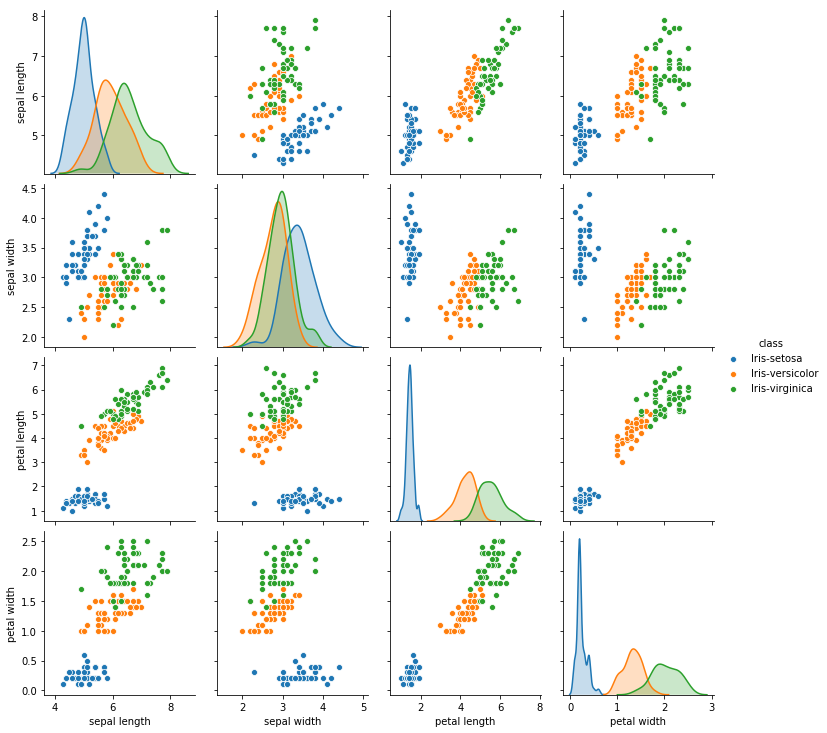

In [12]:
# Multivariate plots
sns.pairplot(data=iris, hue="class")

# 4. Evaluate Some Algorithms

1. keep a Test dataset separate.
2. Setup the validation harness to use 10-fold cross validation.
3. Spot check diﬀerent models to predict species from ﬂower measurements
4. Select the best model.


In [13]:
# Separating Test Set
#The Test set will be used to evaluate the best model at the end
#This is a best practice and gives better estimate of out-of-sample / generalization performance of the model

features = ["sepal length","sepal width", "petal length", "petal width"]
X = iris[features]
y=iris['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [14]:
X_test.shape

(30, 4)

In [15]:
y_test.shape

(30,)

In [16]:
X_train.shape

(120, 4)

In [17]:
y_train.shape

(120,)

In [18]:
# Test Harness
#We will use 10-fold cross validation to estimate accuracy. 
#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. 
#We are using the metric of accuracy to evaluate models. 
#This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 
#We will be using the scoring variable when we run build and evaluate each model.



In [19]:
#Build models
#We don’t know which algorithms would be good on this problem or what conﬁgurations to use. 
#We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results. 
#Let’s evaluate six diﬀerent algorithms:

#Logistic Regression (LR).
#Linear Discriminant Analysis (LDA).
#k-Nearest Neighbors (KNN).
#Classiﬁcation and Regression Trees (CART).
#Gaussian Naive Bayes (NB).
#Support Vector Machines (SVM).
#This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. 


In [20]:
# Lets try one model independently
logreg=LogisticRegression()
score=cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
display(score)
print(score.mean())

array([1.        , 1.        , 0.92307692, 1.        , 1.        ,
       0.91666667, 0.91666667, 0.91666667, 1.        , 1.        ])

0.9673076923076923


In [21]:
# Spot-Check Algorithms
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 

# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [23]:
results[5]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 1.        , 1.        , 1.        ])

In [24]:
# Make predictions on validation dataset using the best model
svc = SVC() 
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test) 


In [27]:
print(accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



In [28]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.


#F1 = 2 * (precision * recall) / (precision + recall)
#its best value at 1 and worst score at 0.